## Datacamp: Exploratory Data Analysis in Python

### Part 1 Notebook: Read, clean, and validate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nsfg = pd.read_hdf('Data/nsfg.hdf5', 'nsfg')
nsfg.head()
print(nsfg.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 9357
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   caseid        9358 non-null   int64  
 1   outcome       9358 non-null   int64  
 2   birthwgt_lb1  6485 non-null   float64
 3   birthwgt_oz1  6391 non-null   float64
 4   prglngth      9358 non-null   int64  
 5   nbrnaliv      6485 non-null   float64
 6   agecon        9358 non-null   int64  
 7   agepreg       9109 non-null   float64
 8   hpagelb       6485 non-null   float64
 9   wgt2013_2015  9358 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 804.2 KB
None


In [3]:
# Display the number of rows and columns
nsfg.shape

# Display the names of the columns
nsfg.columns

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


In [4]:
# Assign variables
ounces = nsfg['birthwgt_oz1']
pounds = ounces = nsfg['birthwgt_lb1']

# Data Validation
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [5]:
# Values of 98 and 99 represent 'Refused' to disclose, and 'Don't Know' respectively
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [6]:
# Replace outliers and review new summary statistics
pounds.replace([98, 99], np.nan, inplace=True)
ounces.replace([98, 99], np.nan, inplace=True)
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
Name: birthwgt_lb1, dtype: int64

In [7]:
# Combine Pounds and Ounces to create complete birthweight float variable
birth_weight = pounds + ounces / 16.0
birth_weight

0       5.3125
1       4.2500
2       5.3125
3          NaN
4       8.5000
         ...  
9353    4.2500
9354    8.5000
9355    7.4375
9356    8.5000
9357    8.5000
Name: birthwgt_lb1, Length: 9358, dtype: float64

In [8]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


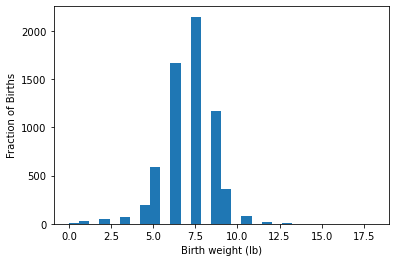

In [9]:
# Plot Histogram

plt.hist(birth_weight.dropna(), bins=30)

plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of Births')

plt.show()

In [10]:
# Create variable for preterm babies

preterm = nsfg['prglngth'] < 37
preterm.sum()

3742

In [11]:
# Apply Boolean Mask to determine preterm weight mean
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.496920492721165

In [12]:
# Apply Boolean Mask to determine full term weight mean
# Apply '~' to invert Booleans

full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.386278879388757

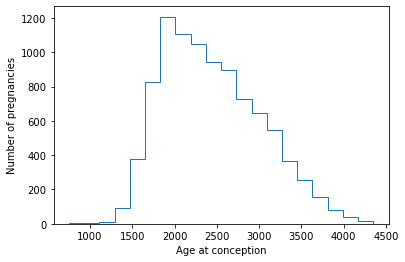

In [13]:
# Plot the histogram
plt.hist(nsfg['agecon'], bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the plot
plt.show()

In [14]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.386278879388757
